## Project: Decision Tree Model Optimization

This project focuses on predicting housing prices in California using the California Housing dataset. The goal is to explore and compare the performance of two machine learning models: a Linear Regression model and a Decision Tree Regressor. The dataset includes various features related to housing, such as population, median income, and proximity to employment centers. The performance of the models is evaluated using the coefficient of determination (R²) to understand how well the models predict the target values.

### Data Import

The initial step involves loading the dataset and performing basic data preprocessing.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [3]:
california_housing = fetch_california_housing()

In [4]:
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
# Check for any missing values in the dataset
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

### Building the Initial Decision Tree Model

The population feature is normalized using MinMaxScaler to prepare it for model training.

In [6]:
scaler = MinMaxScaler()
df['Population'] = scaler.fit_transform(df[['Population']])

In [7]:
X, y = df, california_housing.target

The features and target variables are defined, and the dataset is split into training and test sets in an 80/20 ratio.

In [8]:
# Split sample 80 train/ 20 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

No we can train the regression model on the training set and calculate the accuracy of the model's prediction. A Linear Regression model is trained using the training data. The coefficient of determination (R²) is computed to assess the model's performance.

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Evaluation of the accuracy of the model on the test sample using the coefficient of determination (R^2)
r2_score = lr.score(X_test, y_test)

print(f"Коэффициент детерминации (R^2) на тестовой выборке: {r2_score}")

Коэффициент детерминации (R^2) на тестовой выборке: 0.5757877060324512


A Decision Tree Regressor is trained with a predefined depth. The model's performance is evaluated similarly with R², revealing initial accuracy.

In [11]:
dt = DecisionTreeRegressor(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Оценка точности модели на тестовой выборке может быть выполнена через вычисление R^2
r2_score = dt.score(X_test, y_test)

print(f"Coefficient of determination (R^2) on the test sample: {r2_score}")

Coefficient of determination (R^2) on the test sample: 0.4244060273337801


This indicates that the initial model explains 42.4% of the variance in the target variable, suggesting moderate accuracy.

### Visualization

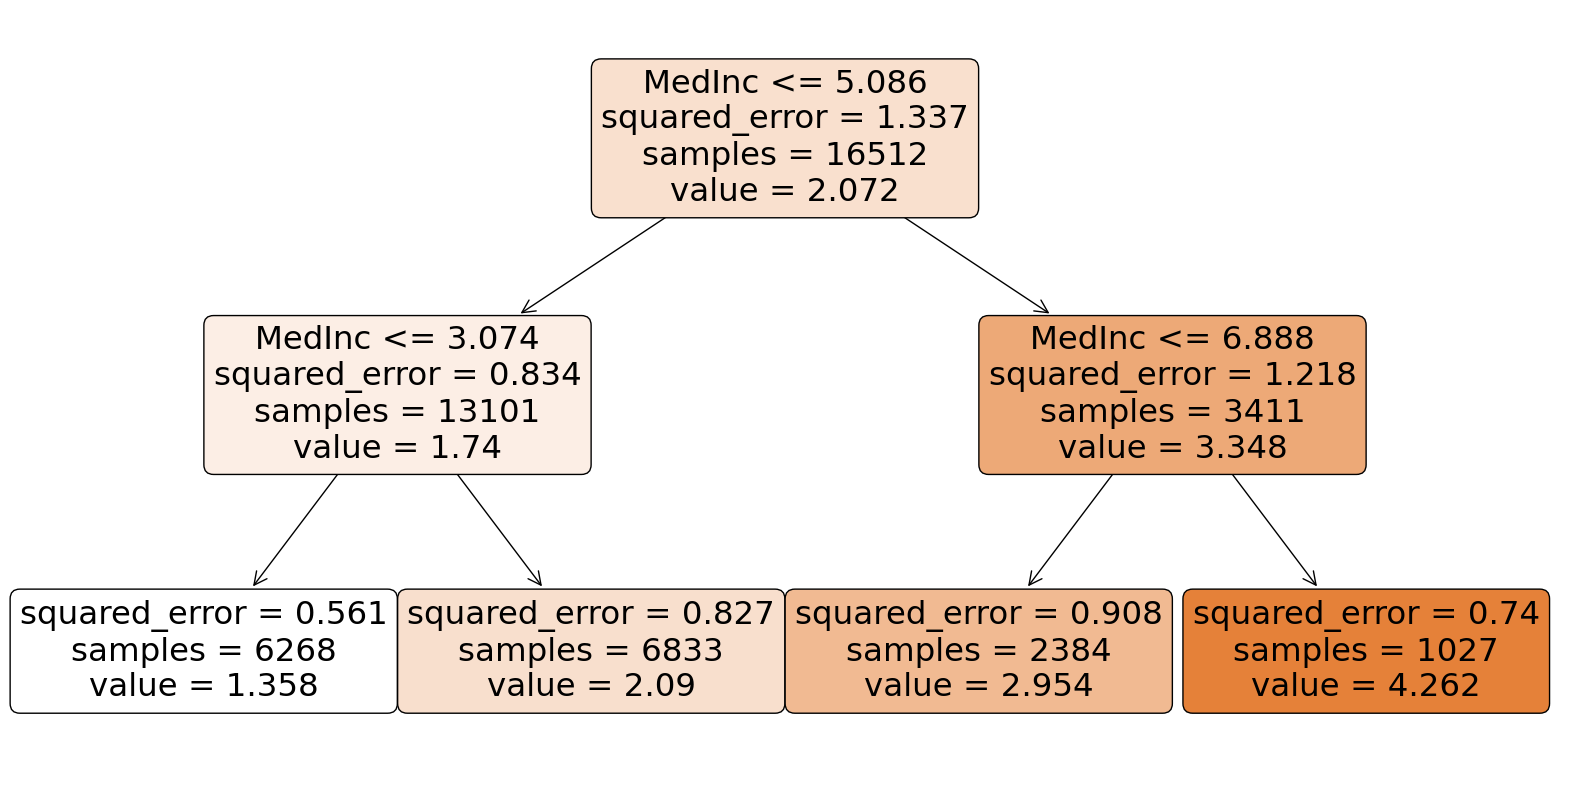

In [12]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=california_housing.feature_names, rounded=True)
plt.show()

### Hyperparameter Tuning with GridSearchCV

To enhance the decision tree model, hyperparameter tuning is performed using GridSearchCV. The max_depth and min_samples_split parameters are optimized. The model's performance is then re-evaluated with the best parameters.

In [13]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 10, 20, 30, 40]
}

# GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 8, 'min_samples_split': 40}


Train the decision tree on the training set and calculate the accuracy of the model's prediction

In [14]:
# Best model
best_dt = grid_search.best_estimator_

# R2 score
r2_score_best = best_dt.score(X_test, y_test)
print(f"Коэффициент детерминации (R^2) для оптимизированной модели на тестовой выборке: {r2_score_best}")

Коэффициент детерминации (R^2) для оптимизированной модели на тестовой выборке: 0.6798332182520016


### Conclusion

The initial decision tree model, with a depth of 2, resulted in an R² score of 0.424, which indicates moderate performance. The linear regression model performed similarly.

After applying Grid Search optimization, the Decision Tree model significantly improved, achieving an R² score of 0.680. This shows that the optimization allowed the model to capture more variance in the target variable, leading to better predictive power.

Decision trees offer the advantage of interpretability, as their structure is easily visualized. However, they require careful tuning to avoid overfitting, which is demonstrated through the grid search process.

- Strengths of decision trees: They are interpretable, easy to visualize, and capture non-linear relationships.
- Weaknesses: They are prone to overfitting and require extensive hyperparameter tuning, which can be time-consuming.

